Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

ROC AUC Score: 0.7733999364964166


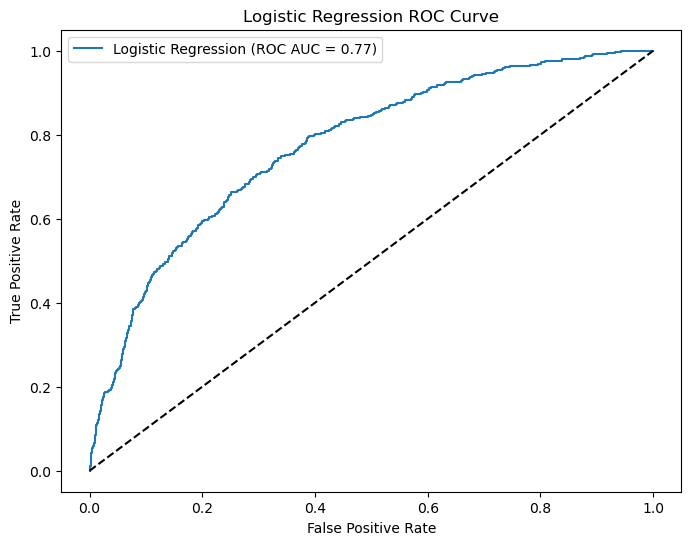

Random Forest:

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000

ROC AUC Score: 0.8576488506985395


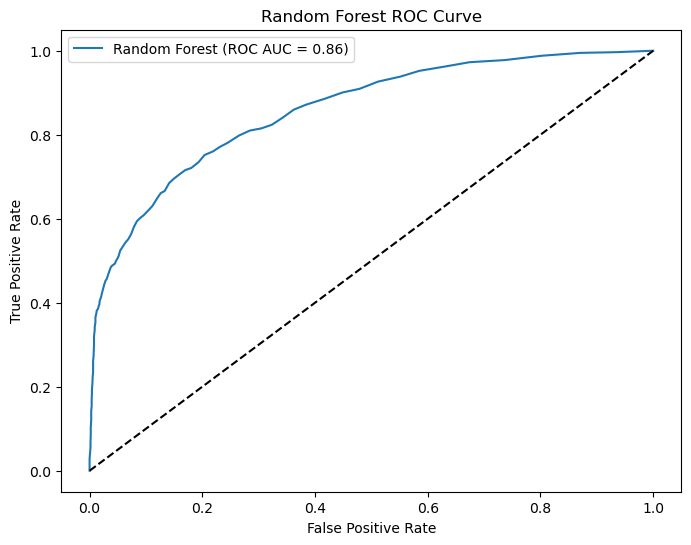

Gradient Boosting:

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

ROC AUC Score: 0.8688066287535154


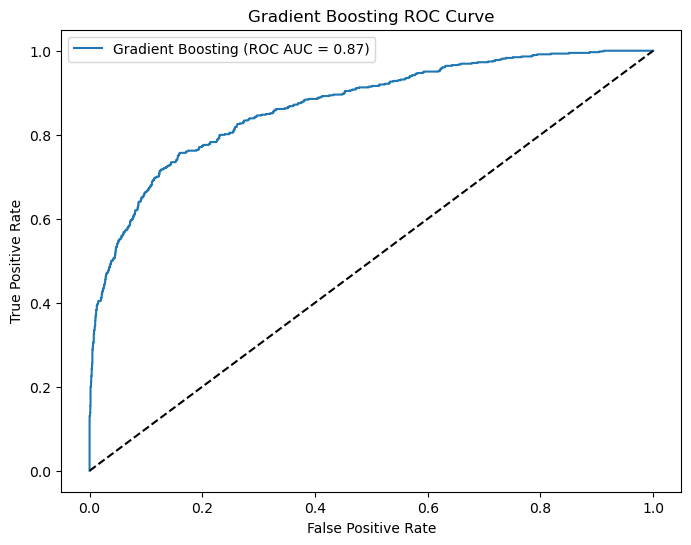

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


data = pd.read_csv("Churn_Modelling.csv")


data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
X = data.drop(columns=["Exited"])
y = data["Exited"]

X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)


def evaluate_model_with_plots(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"{model_name}:\n")
    print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))
    print("ROC AUC Score:", roc_auc)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='best')
    plt.show()


evaluate_model_with_plots(lr_model, X_test_scaled, y_test, "Logistic Regression")
evaluate_model_with_plots(rf_model, X_test_scaled, y_test, "Random Forest")
evaluate_model_with_plots(gb_model, X_test_scaled, y_test, "Gradient Boosting")
